Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data preprocessing

##Training image preprocessing

In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/input/train',
                                                         labels='inferred',
                                                         label_mode='categorical',
                                                         class_names=None,
                                                         color_mode='rgb',
                                                         batch_size=32,
                                                         image_size=(64,64),
                                                         shuffle =True,
                                                         seed=None,
                                                         validation_split=None,
                                                         subset=None,
                                                         interpolation='bilinear',
                                                         follow_links=False,
                                                         crop_to_aspect_ratio=False
                                                         )

Found 3125 files belonging to 36 classes.


##Validation image preprocessing

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/input/validation',
                                                         labels='inferred',
                                                         label_mode='categorical',
                                                         class_names=None,
                                                         color_mode='rgb',
                                                         batch_size=32,
                                                         image_size=(64,64),
                                                         shuffle =True,
                                                         seed=None,
                                                         validation_split=None,
                                                         subset=None,
                                                         interpolation='bilinear',
                                                         follow_links=False,
                                                         crop_to_aspect_ratio=False
                                                         )

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))  # To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) # Output layer

#Compiling and Training phase

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [ ]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=30)

Epoch 1/32
98/98 [==============================] - 1740s 16s/step - loss: 3.5860 - accuracy: 0.0294 - val_loss: 3.5852 - val_accuracy: 0.0285
Epoch 2/32
98/98 [==============================] - 79s 733ms/step - loss: 3.5864 - accuracy: 0.0237 - val_loss: 3.5863 - val_accuracy: 0.0285
Epoch 3/32
98/98 [==============================] - 77s 729ms/step - loss: 3.5836 - accuracy: 0.0282 - val_loss: 3.5857 - val_accuracy: 0.0285
Epoch 4/32
98/98 [==============================] - 81s 759ms/step - loss: 3.5815 - accuracy: 0.0259 - val_loss: 3.5858 - val_accuracy: 0.0285
Epoch 5/32
98/98 [==============================] - 78s 729ms/step - loss: 3.5806 - accuracy: 0.0266 - val_loss: 3.5860 - val_accuracy: 0.0285
Epoch 6/32
98/98 [==============================] - 77s 718ms/step - loss: 3.5799 - accuracy: 0.0272 - val_loss: 3.5863 - val_accuracy: 0.0285
Epoch 7/32
98/98 [==============================] - 77s 725ms/step - loss: 3.5795 - accuracy: 0.0314 - val_loss: 3.5866 - val_accuracy: 0.0285

#Saving Model

In [ ]:
cnn.save('fruits_veg_trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [6.921772003173828,
  3.8790459632873535,
  3.7997686862945557,
  3.458854913711548,
  3.575326919555664,
  3.177257537841797,
  2.9189791679382324,
  2.7268226146698,
  2.8900771141052246,
  2.288668632507324,
  2.2530219554901123,
  2.0797946453094482,
  1.8729952573776245,
  1.7100147008895874,
  1.8974488973617554,
  2.095862627029419,
  1.6482923030853271,
  1.23524010181427,
  1.4363943338394165,
  1.253093957901001,
  1.6910574436187744,
  1.2286286354064941,
  1.0395411252975464,
  1.0463898181915283,
  1.1573870182037354,
  1.0977904796600342,
  0.9645591378211975,
  1.0007119178771973,
  0.9558733105659485,
  0.9787720441818237],
 'accuracy': [0.03840000182390213,
  0.04992000013589859,
  0.09216000139713287,
  0.1398400068283081,
  0.17759999632835388,
  0.23520000278949738,
  0.2969599962234497,
  0.33983999490737915,
  0.3868800103664398,
  0.4636799991130829,
  0.48159998655319214,
  0.5244799852371216,
  0.5712000131607056,
  0.609279990196228,
  0.6339200139045

In [ ]:
# Recording training history
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of the Model

In [ ]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 91.45299196243286 %


#Accuracy Visualization

##Training Visualization

Text(0.5, 1.0, 'Traing Accuracy Visualization')

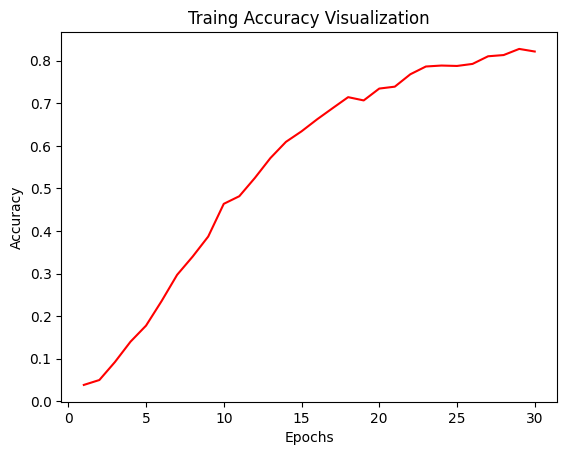

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Traing Accuracy Visualization')

##Validation Visualization

Text(0.5, 1.0, 'Traing Accuracy Visualization')

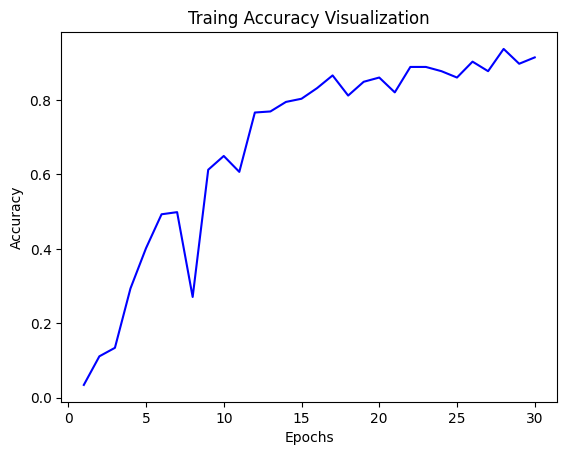

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['val_accuracy'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Traing Accuracy Visualization')